In [2]:
# import libraries
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# display complete text in columns
pd.set_option('display.max_colwidth', -1)

# read the App description dataset

descDataSet = pd.read_csv('DataSet/app-store-apple-data-set-10k-apps/appleStore_description.csv')

# read the App Store dataset

storeDataSet = pd.read_csv('DataSet/app-store-apple-data-set-10k-apps/AppleStore.csv')

## What sorts of questions can I answer with text data?


In [4]:
# Merge the datasets to get the user rating and App description in one dataset
AppDataSet = pd.merge(descDataSet, storeDataSet, on=['id', 'track_name', 'size_bytes'])

# drop the extra columns
AppDataSet.drop('Unnamed: 0', axis=1)

# Create a new column "text_count" to get the word count from each App description
AppDataSet['text_count'] = [len(AppDataSet['app_desc'][each].split()) for each in range(len(AppDataSet))]

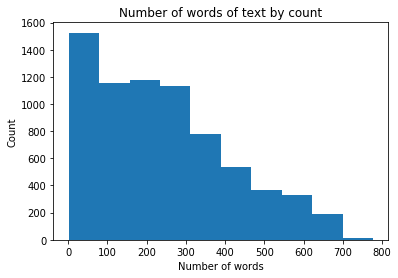

In [5]:
# Plot the count of words in App description

plt.hist(x=AppDataSet['text_count'])
plt.title('Number of words of text by count')
plt.xlabel('Number of words')
plt.ylabel('Count');

## Looking at Apps with rating > 4

In [6]:
# Get a subset of adatset with the higher user ratings
df = AppDataSet[AppDataSet['user_rating'] > 4]

# Build a corpus of words
corpus = AppDataSet['app_desc']

# Instantiate a CountVectorizer
cvec = CountVectorizer(stop_words='english', ngram_range=(1, 2))

# Fit the vectorizer on our corpus
cvec.fit(corpus) 

# Transform the corpus
new_corpus = cvec.transform(corpus)
new_corpus # only non zeros are "saved" in memory
 
new_corpus.todense()

cvec.get_feature_names()

pd.DataFrame(new_corpus.todense(), columns=cvec.get_feature_names())

# Create a new dataframe using the new corpus and feature names as column
df  = pd.DataFrame(new_corpus.todense(),
                   columns=cvec.get_feature_names())

In [7]:
# Ignore commonly used words in the App description

from sklearn.feature_extraction import stop_words

cv = CountVectorizer(stop_words='english', min_df=2)

cv.fit(AppDataSet['app_desc'])
cv.transform(AppDataSet['app_desc'])

df = pd.DataFrame(cv.transform(AppDataSet['app_desc']).todense(), columns=cv.get_feature_names())

words = df.sum().sort_values(ascending=False)[:50000].index

## Train-test split the dataset

In [8]:
X = df[words]
y = AppDataSet['user_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Using KNNeighbors

In [9]:
np.random.seed(42)
knn = KNeighborsRegressor(n_neighbors=5)

knnmodel = knn.fit(X_train, y_train)
# Score our model
print(knnmodel.score(X_train, y_train))

0.04255209805042426


In [10]:
print(knnmodel.score(X_test, y_test))

-0.4480890269332001


In [11]:
from sklearn.grid_search import GridSearchCV

params_grid = {'n_neighbors': [ 4,5, 6, 7, 8, 9]}

gs = GridSearchCV(knn, params_grid, verbose=2)

# replace with X_train and y_train
gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)
print(gs.score(X_test, y_test))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] n_neighbors=4 ...................................................


/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


[CV] .......................................... n_neighbors=4 - 3.4min
[CV] n_neighbors=4 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.4min remaining:    0.0s


[CV] .......................................... n_neighbors=4 - 3.4min
[CV] n_neighbors=4 ...................................................
[CV] .......................................... n_neighbors=4 - 3.4min
[CV] n_neighbors=5 ...................................................
[CV] .......................................... n_neighbors=5 - 3.4min
[CV] n_neighbors=5 ...................................................
[CV] .......................................... n_neighbors=5 - 3.4min
[CV] n_neighbors=5 ...................................................
[CV] .......................................... n_neighbors=5 - 3.4min
[CV] n_neighbors=6 ...................................................
[CV] .......................................... n_neighbors=6 - 3.4min
[CV] n_neighbors=6 ...................................................
[CV] .......................................... n_neighbors=6 - 3.4min
[CV] n_neighbors=6 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 61.9min finished


-0.6976024481387336
{'n_neighbors': 5}
-0.4480890269332001


## Using Linear Regression

In [12]:
np.random.seed(42)
lr = LinearRegression()

model = lr.fit(X_train, y_train)
# Score our model
print(model.score(X_train, y_train))

0.9886460481761223


In [13]:
print(model.score(X_test, y_test))

-9.830589098630229e+22


In [14]:
from sklearn.grid_search import GridSearchCV

params_grid = {'fit_intercept':[True, False], 'normalize':[True, False]}

gs = GridSearchCV(lr, params_grid, verbose=2)

# replace with X_train and y_train
gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)
print(gs.score(X_test, y_test))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] fit_intercept=True, normalize=True ..............................
[CV] ..................... fit_intercept=True, normalize=True -  28.2s
[CV] fit_intercept=True, normalize=True ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.2s remaining:    0.0s


[CV] ..................... fit_intercept=True, normalize=True -  28.1s
[CV] fit_intercept=True, normalize=True ..............................
[CV] ..................... fit_intercept=True, normalize=True -  28.3s
[CV] fit_intercept=True, normalize=False .............................
[CV] .................... fit_intercept=True, normalize=False -  27.7s
[CV] fit_intercept=True, normalize=False .............................
[CV] .................... fit_intercept=True, normalize=False -  27.6s
[CV] fit_intercept=True, normalize=False .............................
[CV] .................... fit_intercept=True, normalize=False -  27.6s
[CV] fit_intercept=False, normalize=True .............................
[CV] .................... fit_intercept=False, normalize=True -  27.3s
[CV] fit_intercept=False, normalize=True .............................
[CV] .................... fit_intercept=False, normalize=True -  27.4s
[CV] fit_intercept=False, normalize=True .............................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  5.5min finished


-1.3030197608557463e+21
{'fit_intercept': False, 'normalize': True}
-5.838885925927435
